===========iteration:0===========
SGD:2.3365192613737964
Momentum:2.353510427297725
AdaGrad:2.001565977270257
Adam:2.1876720279693815
===========iteration:100===========
SGD:1.3571402435915445
Momentum:0.33714105264759053
AdaGrad:0.14084666091325002
Adam:0.2343769135225003
===========iteration:200===========
SGD:0.6405946178942665
Momentum:0.18722286490392176
AdaGrad:0.042191547288728246
Adam:0.12119812137502273
===========iteration:300===========
SGD:0.4699330978225127
Momentum:0.17081147228724589
AdaGrad:0.09803442831109987
Adam:0.13830133188484411
===========iteration:400===========
SGD:0.3795652796234934
Momentum:0.17821491462410463
AdaGrad:0.10202539999662251
Adam:0.16751011648922626
===========iteration:500===========
SGD:0.5001738619050597
Momentum:0.21297144001522494
AdaGrad:0.07149091560718249
Adam:0.15670646909494923
===========iteration:600===========
SGD:0.296565641464665
Momentum:0.10196679745517462
AdaGrad:0.03357822771337304
Adam:0.057581464719796555
===========iteration

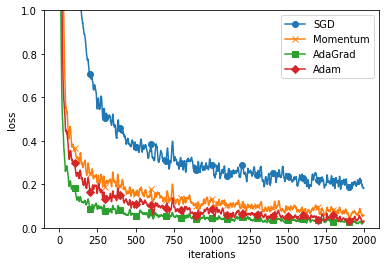

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
